In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('seaborn')

%matplotlib inline

In [2]:
#Importing data from the well header worksheet
well_header=pd.read_csv('TVD data.csv')

In [4]:
well_header.dropna()

,EPAssetsId,UWI,CurrentStatus,CurrentStatusStandardised,WellType,WellTypeStandardised,Formation,Field,Surf_Township,Surf_Meridian,...,KBElevation,TotalDepth,SpudDate,FinalDrillDate,RigReleaseDate,DaysDrilling,DrillMetresPerDay,TVD,WellProfile,ProjectedDepth
1,2593278,102052706624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,770.8,3607.0,5/26/2016,6/8/2016,6/10/2016,13.0,277.46,1954.58,Horizontal,3700.0
2,2579437,100162206624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,759.4,3502.0,1/6/2015,1/19/2015,1/22/2015,13.0,269.38,1940.06,Horizontal,3800.0
3,2591761,100092206624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,759.8,3491.0,1/12/2016,1/24/2016,1/26/2016,12.0,290.92,1945.01,Horizontal,3500.0
4,2587302,100082206624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,767.7,3578.0,12/28/2015,1/8/2016,1/11/2016,11.0,325.27,1956.34,Horizontal,3800.0
5,2600942,102120606724W500,Flowing,Active,Crude Oil,Oil,Montney,Ante Creek North,67,W5,...,725.0,3659.0,3/20/2017,3/27/2017,3/29/2017,7.0,522.71,1911.62,Horizontal,3688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,2612600,103121303409W400,Pumping,Active,Crude Oil,Oil,Viking,Provost,34,W4,...,784.8,2024.0,6/8/2018,7/30/2018,7/31/2018,52.0,38.92,891.82,Directional,2059.0
10427,2605004,102131103409W400,Pumping,Active,Crude Oil,Oil,Viking,Provost,34,W4,...,785.8,2002.0,7/28/2017,8/12/2017,8/13/2017,15.0,133.47,896.85,Horizontal,2005.0
10428,2605001,100131103409W400,Pumping,Active,Crude Oil,Oil,Viking,Provost,34,W4,...,785.5,2227.0,7/30/2017,8/8/2017,8/9/2017,9.0,247.44,897.58,Horizontal,2227.0
10433,2613170,100092202603W500,Pumping,Active,Crude Oil,Oil,Cardium,Lochend,26,W5,...,1247.4,4779.0,8/17/2018,8/24/2018,8/26/2018,7.0,682.71,2209.00,Directional,4773.3


In [7]:
well_header.head()

,EPAssetsId,UWI,CurrentStatus,CurrentStatusStandardised,WellType,WellTypeStandardised,Formation,Field,Surf_Township,Surf_Meridian,...,KBElevation,TotalDepth,SpudDate,FinalDrillDate,RigReleaseDate,DaysDrilling,DrillMetresPerDay,TVD,WellProfile,ProjectedDepth
0,2587301,100122706624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,764.8,3677.0,12/5/2015,12/18/2015,12/21/2015,13.0,282.85,NaN,Horizontal,3800.0
1,2593278,102052706624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,770.8,3607.0,5/26/2016,6/8/2016,6/10/2016,13.0,277.46,1954.58,Horizontal,3700.0
2,2579437,100162206624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,759.4,3502.0,1/6/2015,1/19/2015,1/22/2015,13.0,269.38,1940.06,Horizontal,3800.0
3,2591761,100092206624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,759.8,3491.0,1/12/2016,1/24/2016,1/26/2016,12.0,290.92,1945.01,Horizontal,3500.0
4,2587302,100082206624W500,Gas Lift,Active,Crude Oil,Oil,Montney,Ante Creek North,66,W5,...,767.7,3578.0,12/28/2015,1/8/2016,1/11/2016,11.0,325.27,1956.34,Horizontal,3800.0


In [8]:
well_header['Field'].unique().shape

(136,)

In [9]:
well_header.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EPAssetsId,10435.0,1.609465e+06,960901.188424,3373.000000,1.159958e+06,1.171542e+06,2.602620e+06,2.625908e+06
Surf_Longitude,10435.0,-1.138203e+02,6.242356,-122.939258,-1.187278e+02,-1.134080e+02,-1.090770e+02,0.000000e+00
Surf_Latitude,10435.0,5.320206e+01,2.609652,0.000000,5.161121e+01,5.229271e+01,5.477321e+01,5.752191e+01
BH_Longitude,8695.0,-1.125413e+02,4.094462,-119.999593,-1.169032e+02,-1.104887e+02,-1.089319e+02,-1.077269e+02
BH_Latitude,8695.0,5.266466e+01,1.429851,49.964650,5.156799e+01,5.192330e+01,5.422132e+01,5.658039e+01
GroundElevation,10427.0,7.852871e+02,157.428037,565.200000,6.941000e+02,7.271000e+02,8.597000e+02,9.914000e+03
KBElevation,10435.0,7.896893e+02,130.284316,569.800000,6.984000e+02,7.332000e+02,8.660000e+02,1.377000e+03
TotalDepth,10435.0,3.235802e+03,1641.372670,888.000000,1.600000e+03,2.586000e+03,4.583500e+03,7.848000e+03
DaysDrilling,10429.0,1.857446e+01,32.525213,0.000000,2.000000e+00,8.000000e+00,2.000000e+01,7.380000e+02
DrillMetresPerDay,10435.0,6.260465e+02,516.959831,0.000000,2.098300e+02,4.575000e+02,9.015000e+02,2.655000e+03


In [10]:
well_header.isnull().sum()

EPAssetsId                      0
UWI                             0
CurrentStatus                   0
CurrentStatusStandardised       0
WellType                        0
WellTypeStandardised            0
Formation                       0
Field                           0
Surf_Township                   0
Surf_Meridian                   0
Surf_Range                      0
Surf_Section                    0
Surf_LSD                        0
Surf_Longitude                  0
Surf_Latitude                   0
BH_Longitude                 1740
BH_Latitude                  1740
BH_Township                     0
BH_Meridian                     0
BH_Range                        0
BH_Section                      0
BH_LSD                          0
GroundElevation                 8
KBElevation                     0
TotalDepth                      0
SpudDate                        0
FinalDrillDate               1740
RigReleaseDate                  0
DaysDrilling                    6
DrillMetresPer

In [11]:
well_cut=well_header[well_header.Formation!='Cardium']

In [12]:
Testwells=pd.read_csv('Submission_Sample.csv')

In [13]:
testwellarea=pd.merge(well_cut,Testwells, on='EPAssetsId')

In [14]:
print(testwellarea[testwellarea.Formation=='Montney'].shape)
print(testwellarea[testwellarea.Formation=='Viking'].shape)
print(testwellarea[testwellarea.Formation=='Duvernay'].shape)


(456, 34)
(1303, 34)
(204, 34)


In [15]:
duv=well_cut[well_cut.Formation=='Duvernay']
vik=well_cut[well_cut.Formation=='Viking']
mon=well_cut[well_cut.Formation=='Montney']

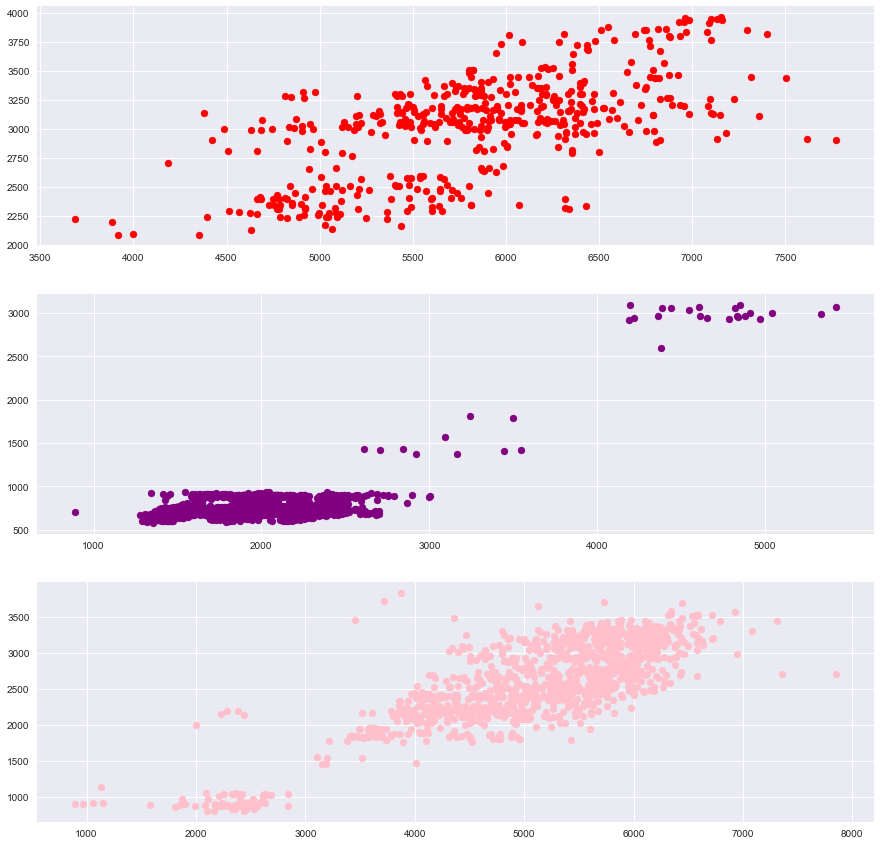

In [16]:
fig, ax=plt.subplots(3,1, figsize=(15,15))

ax[0].scatter(duv['TotalDepth'], duv['TVD'], color='red')
ax[1].scatter(vik['TotalDepth'], vik['TVD'], color='purple')
ax[2].scatter(mon['TotalDepth'], mon['TVD'], color='pink')

# Viking 

In [17]:
#Variables selection for the model
vik_wells=vik[['EPAssetsId','TVD','WellProfile','WellTypeStandardised','TotalDepth','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']]
data_vik=vik_wells[vik_wells.TVD.notnull()]
data_vik.columns=['EPAssetsId','TVD','WellProfile','WellType','TotalDepth','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']
data_vik

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
424,2607786,2589.92,Horizontal,Gas,4381.0,-117.198497,53.785404,-117.175573,53.793828,999.4,22,34,8,22,28,16
533,2616194,2993.28,Directional,Gas,4910.0,-116.171848,52.977892,-116.147814,52.968143,1207.0,15,17,12,15,19,4
577,2613225,2928.50,Directional,Gas,4782.0,-116.151516,52.989115,-116.168112,53.003310,1169.0,15,30,14,15,29,4
578,2613226,2927.96,Directional,Gas,4972.0,-116.151572,52.989087,-116.127688,52.976228,1169.0,15,21,4,15,29,4
579,2604862,3037.77,Horizontal,Gas,4549.0,-116.103596,52.916347,-116.114842,52.929220,1226.3,15,33,15,15,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,2612600,891.82,Directional,Oil,2024.0,-111.146918,51.913412,-111.159038,51.920063,784.8,9,13,12,9,13,2
10427,2605004,896.85,Horizontal,Oil,2002.0,-111.183763,51.920839,-111.183312,51.909827,785.8,9,11,13,9,14,12
10428,2605001,897.58,Horizontal,Oil,2227.0,-111.183762,51.920983,-111.181076,51.909192,785.5,9,11,13,9,14,12
10429,2619591,888.62,Directional,Oil,2068.0,-111.199446,51.895504,-111.210328,51.902829,777.7,9,9,8,9,3,14


In [18]:
#Creating dummies for categorical variables WellProfile and WellType

vik_profile_dummies = pd.get_dummies(data_vik.WellProfile, prefix='WellProfile').iloc[:,1:]
vik_type_dummies = pd.get_dummies(data_vik.WellType, prefix='WellType').iloc[:,1:]
#vik_field_dummies = pd.get_dummies(data_vik.Field, prefix='Formation').iloc[:,1:]

df_vik = pd.concat([data_vik,vik_profile_dummies,vik_type_dummies], axis=1)
df_vik

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil
424,2607786,2589.92,Horizontal,Gas,4381.0,-117.198497,53.785404,-117.175573,53.793828,999.4,22,34,8,22,28,16,1,0
533,2616194,2993.28,Directional,Gas,4910.0,-116.171848,52.977892,-116.147814,52.968143,1207.0,15,17,12,15,19,4,0,0
577,2613225,2928.50,Directional,Gas,4782.0,-116.151516,52.989115,-116.168112,53.003310,1169.0,15,30,14,15,29,4,0,0
578,2613226,2927.96,Directional,Gas,4972.0,-116.151572,52.989087,-116.127688,52.976228,1169.0,15,21,4,15,29,4,0,0
579,2604862,3037.77,Horizontal,Gas,4549.0,-116.103596,52.916347,-116.114842,52.929220,1226.3,15,33,15,15,34,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,2612600,891.82,Directional,Oil,2024.0,-111.146918,51.913412,-111.159038,51.920063,784.8,9,13,12,9,13,2,0,1
10427,2605004,896.85,Horizontal,Oil,2002.0,-111.183763,51.920839,-111.183312,51.909827,785.8,9,11,13,9,14,12,1,1
10428,2605001,897.58,Horizontal,Oil,2227.0,-111.183762,51.920983,-111.181076,51.909192,785.5,9,11,13,9,14,12,1,1
10429,2619591,888.62,Directional,Oil,2068.0,-111.199446,51.895504,-111.210328,51.902829,777.7,9,9,8,9,3,14,0,1


In [19]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
sec_vik=df_vik.iloc[:,[1,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
scale_vik=StandardScaler()
scaled_vik=scale_vik.fit_transform(sec_vik)
df_vik=pd.DataFrame(scaled_vik)
df_vik

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,10.009397,6.297959,-6.453795,4.380547,-6.431683,4.398145,5.247274,0.549828,1.405836,-0.102282,0.550089,0.792571,1.517334,0.290196,-12.984941
1,12.196272,7.587989,-5.603357,2.696333,-5.580757,2.676003,8.966656,-0.556432,-0.225785,0.725525,-0.556369,-0.074727,-0.913599,-3.445952,-12.984941
2,11.845058,7.275846,-5.586514,2.719740,-5.597563,2.749352,8.285844,-0.556432,1.021925,1.139428,-0.556369,0.888937,-0.913599,-3.445952,-12.984941
3,11.842130,7.739184,-5.586561,2.719682,-5.564094,2.692866,8.285844,-0.556432,0.158126,-0.930089,-0.556369,0.888937,-0.913599,-3.445952,-12.984941
4,12.437481,6.707647,-5.546819,2.567969,-5.553458,2.594821,9.312436,-0.556432,1.309858,1.346380,-0.556369,1.370769,-0.913599,0.290196,-12.984941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,0.802902,0.550132,-1.440886,0.476164,-1.450335,0.490010,1.402480,-1.504655,-0.609696,0.725525,-1.504762,-0.652925,-1.318754,-3.445952,0.077012
3897,0.830173,0.496482,-1.471407,0.491654,-1.470432,0.468660,1.420396,-1.504655,-0.801651,0.932476,-1.504762,-0.556558,0.707023,0.290196,0.077012
3898,0.834131,1.045171,-1.471407,0.491955,-1.468581,0.467336,1.415021,-1.504655,-0.801651,0.932476,-1.504762,-0.556558,0.707023,0.290196,0.077012
3899,0.785553,0.657431,-1.484399,0.438813,-1.492800,0.454064,1.275275,-1.504655,-0.993607,-0.102282,-1.504762,-1.616588,1.112178,-3.445952,0.077012


In [20]:
#Extrating feature variables for the model
X_vik=df_vik.iloc[:, 1:]
y_vik=df_vik.iloc[:, 0]
X_vik

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,6.297959,-6.453795,4.380547,-6.431683,4.398145,5.247274,0.549828,1.405836,-0.102282,0.550089,0.792571,1.517334,0.290196,-12.984941
1,7.587989,-5.603357,2.696333,-5.580757,2.676003,8.966656,-0.556432,-0.225785,0.725525,-0.556369,-0.074727,-0.913599,-3.445952,-12.984941
2,7.275846,-5.586514,2.719740,-5.597563,2.749352,8.285844,-0.556432,1.021925,1.139428,-0.556369,0.888937,-0.913599,-3.445952,-12.984941
3,7.739184,-5.586561,2.719682,-5.564094,2.692866,8.285844,-0.556432,0.158126,-0.930089,-0.556369,0.888937,-0.913599,-3.445952,-12.984941
4,6.707647,-5.546819,2.567969,-5.553458,2.594821,9.312436,-0.556432,1.309858,1.346380,-0.556369,1.370769,-0.913599,0.290196,-12.984941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,0.550132,-1.440886,0.476164,-1.450335,0.490010,1.402480,-1.504655,-0.609696,0.725525,-1.504762,-0.652925,-1.318754,-3.445952,0.077012
3897,0.496482,-1.471407,0.491654,-1.470432,0.468660,1.420396,-1.504655,-0.801651,0.932476,-1.504762,-0.556558,0.707023,0.290196,0.077012
3898,1.045171,-1.471407,0.491955,-1.468581,0.467336,1.415021,-1.504655,-0.801651,0.932476,-1.504762,-0.556558,0.707023,0.290196,0.077012
3899,0.657431,-1.484399,0.438813,-1.492800,0.454064,1.275275,-1.504655,-0.993607,-0.102282,-1.504762,-1.616588,1.112178,-3.445952,0.077012


# kNN

In [21]:
#Using a kNN model 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    X_train,X_test,y_train,y_test=train_test_split(X_vik,y_vik,test_size=0.3, random_state=K)
    
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    
    training_score=model.score(X_train,y_train)
    testing_score=model.score(X_test,y_test)
   
    if testing_score < training_score:
        print("Testing : {} Training : {} Random State: {}".format(testing_score,training_score,K))
    
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
    

Testing : 0.9050606668452699 Training : 1.0 Random State: 1
RMSE value for k=  1 is: 0.359541190111083
Testing : 0.973452433160063 Training : 0.9842977355302666 Random State: 2
RMSE value for k=  2 is: 0.16759952853832602
RMSE value for k=  3 is: 0.1247945096716371
Testing : 0.9689081841203683 Training : 0.9910050622189807 Random State: 4
RMSE value for k=  4 is: 0.15790891834341084
Testing : 0.9873412798575747 Training : 0.9888796866412597 Random State: 5
RMSE value for k=  5 is: 0.12666524502853746
Testing : 0.9777663650123035 Training : 0.9825556562380638 Random State: 6
RMSE value for k=  6 is: 0.13426162561029964
Testing : 0.9596780819040119 Training : 0.9821146409929755 Random State: 7
RMSE value for k=  7 is: 0.204517723290491
Testing : 0.9588433323884915 Training : 0.9832812592854308 Random State: 8
RMSE value for k=  8 is: 0.14883033865403328
Testing : 0.9722708136348119 Training : 0.9789298980094547 Random State: 9
RMSE value for k=  9 is: 0.16500840633499225
RMSE value for k

<AxesSubplot:>

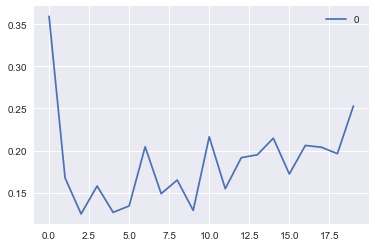

In [22]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [23]:
#Selecting the random set from the above analysis
from sklearn.model_selection import train_test_split, cross_val_score
X_train_vik,X_test_vik,y_train_vik,y_test_vik=train_test_split(X_vik,y_vik,test_size=0.3, random_state=5)
model_vik = KNeighborsRegressor(n_neighbors = 2)
model_vik.fit(X_train_vik, y_train_vik)

KNeighborsRegressor(n_neighbors=2)

In [24]:
print('Training Features Shape:', X_train_vik.shape)
print('Training TVD Shape:', y_train_vik.shape)
print('Testing Features Shape:', X_test_vik.shape)
print('Testing TVD Shape:', y_test_vik.shape)

Training Features Shape: (2730, 14)
Training TVD Shape: (2730,)
Testing Features Shape: (1171, 14)
Testing TVD Shape: (1171,)


In [25]:
model_vik.score(X_train_vik,y_train_vik)

0.9961231503464721

In [26]:
model_vik.score(X_test_vik,y_test_vik)

0.9882392263407471

## Random Regression-VIK

In [ ]:
# Import the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate model with 1000 decision trees
rf_vik = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_vik.fit(X_train_vik,y_train_vik);

In [ ]:
rf_vik_predictions=rf_vik.predict(X_test_vik)

In [ ]:
rf_vik.score(X_train_vik,y_train_vik)

In [ ]:
rf_vik.score(X_test_vik,y_test_vik)

In [27]:
error1 = sqrt(mean_squared_error(y_test_vik,rf_vik_predictions))
error1

0.06296296593310524

# Preparing the prediction data

In [28]:
#Now getting the duv testing data to make predictions
test_data_vik=vik_wells[vik_wells.TVD.isnull()] #Getting the data where TVD need to be predicted
test_data_vik.columns=['EPAssetsId','TVD','WellProfile','WellType','TotalDepth','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']
test_data_vik

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
1511,2595449,NaN,Horizontal,Oil,1692.0,-113.143724,53.894557,-113.161216,53.895410,646.6,22,2,7,22,1,5
1541,2610964,NaN,Horizontal,Oil,1942.0,-110.578656,51.994278,-110.560219,51.992667,711.1,4,7,10,5,12,16
1601,2579208,NaN,Horizontal,Oil,1528.0,-113.046701,53.894090,-113.061774,53.895328,625.0,21,4,7,21,3,4
1604,2595580,NaN,Horizontal,Oil,1834.0,-113.247570,53.981458,-113.253763,53.991619,661.9,22,6,16,22,5,4
1621,2595577,NaN,Horizontal,Oil,1560.0,-113.165923,53.901482,-113.151316,53.902580,649.0,22,2,16,22,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,2593752,NaN,Horizontal,Oil,2060.0,-111.161530,51.912631,-111.167073,51.922555,783.0,9,14,16,9,13,4
10422,2588281,NaN,Horizontal,Oil,1716.0,-111.175877,51.910109,-111.178837,51.917665,782.8,9,14,6,9,11,14
10425,2588282,NaN,Horizontal,Oil,1737.0,-111.137825,51.910015,-111.140736,51.917843,784.4,9,13,8,8,7,13
10426,2588283,NaN,Horizontal,Oil,1759.0,-111.161386,51.912631,-111.160026,51.903725,782.9,9,12,12,9,13,4


In [29]:
#Creating dummies for categorical variables WellProfile and WellType

#well_formation_dummies_test = pd.get_dummies(test_data.Formation, prefix='Formation').iloc[:,1:]
vik_profile_dummies_test = pd.get_dummies(test_data_vik.WellProfile, prefix='WellProfile').iloc[:,1:]
vik_type_dummies_test = pd.get_dummies(test_data_vik.WellType, prefix='WellType').iloc[:,1:]

test_vik = pd.concat([test_data_vik, vik_profile_dummies_test,vik_type_dummies_test], axis=1)
test_vik

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil
1511,2595449,NaN,Horizontal,Oil,1692.0,-113.143724,53.894557,-113.161216,53.895410,646.6,22,2,7,22,1,5,1,1
1541,2610964,NaN,Horizontal,Oil,1942.0,-110.578656,51.994278,-110.560219,51.992667,711.1,4,7,10,5,12,16,1,1
1601,2579208,NaN,Horizontal,Oil,1528.0,-113.046701,53.894090,-113.061774,53.895328,625.0,21,4,7,21,3,4,1,1
1604,2595580,NaN,Horizontal,Oil,1834.0,-113.247570,53.981458,-113.253763,53.991619,661.9,22,6,16,22,5,4,1,1
1621,2595577,NaN,Horizontal,Oil,1560.0,-113.165923,53.901482,-113.151316,53.902580,649.0,22,2,16,22,2,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,2593752,NaN,Horizontal,Oil,2060.0,-111.161530,51.912631,-111.167073,51.922555,783.0,9,14,16,9,13,4,1,1
10422,2588281,NaN,Horizontal,Oil,1716.0,-111.175877,51.910109,-111.178837,51.917665,782.8,9,14,6,9,11,14,1,1
10425,2588282,NaN,Horizontal,Oil,1737.0,-111.137825,51.910015,-111.140736,51.917843,784.4,9,13,8,8,7,13,1,1
10426,2588283,NaN,Horizontal,Oil,1759.0,-111.161386,51.912631,-111.160026,51.903725,782.9,9,12,12,9,13,4,1,1


In [30]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
tes_vik=test_vik.iloc[:,4:19]
scale_test_vik=StandardScaler()
scaled_test_vik=scale_test_vik.fit_transform(tes_vik)
test_pred_vik=pd.DataFrame(scaled_test_vik)
test_pred_vik

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.236947,-3.128829,4.884673,-3.143034,4.888989,-1.140441,0.555097,-1.616359,-0.307825,0.555331,-1.717232,-0.665602,0.294147,0.078507
1,0.392185,-0.968669,0.681865,-0.953092,0.678679,0.051102,-2.246970,-1.152105,0.317075,-2.091610,-0.693463,1.561236,0.294147,0.078507
2,-0.649658,-3.047121,4.883640,-3.059308,4.888808,-1.539470,0.399427,-1.430657,-0.307825,0.399628,-1.531093,-0.868042,0.294147,0.078507
3,0.120400,-3.216282,5.076870,-3.220956,5.101876,-0.857796,0.555097,-1.244956,1.566876,0.555331,-1.344953,-0.868042,0.294147,0.078507
4,-0.569129,-3.147524,4.899988,-3.134699,4.904855,-1.096105,0.555097,-1.616359,1.566876,0.555331,-1.624163,0.549037,0.294147,0.078507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0.689135,-1.459534,0.501288,-1.464040,0.523538,1.379350,-1.468618,-0.502148,1.566876,-1.468800,-0.600394,-0.868042,0.294147,0.078507
1302,-0.176551,-1.471616,0.495710,-1.473945,0.512718,1.375655,-1.468618,-0.502148,-0.516125,-1.468800,-0.786533,1.156356,0.294147,0.078507
1303,-0.123704,-1.439571,0.495502,-1.441866,0.513112,1.405213,-1.468618,-0.594999,-0.099525,-1.624503,-1.158813,0.953916,0.294147,0.078507
1304,-0.068340,-1.459412,0.501288,-1.458107,0.481872,1.377502,-1.468618,-0.687850,0.733676,-1.468800,-0.600394,-0.868042,0.294147,0.078507


In [31]:
#Prediction on the testing set
predicted1=model_vik.predict(test_pred_vik)

In [32]:
import statistics as sc
back=predicted1*data_vik['TVD'].std()+data_vik['TVD'].mean()

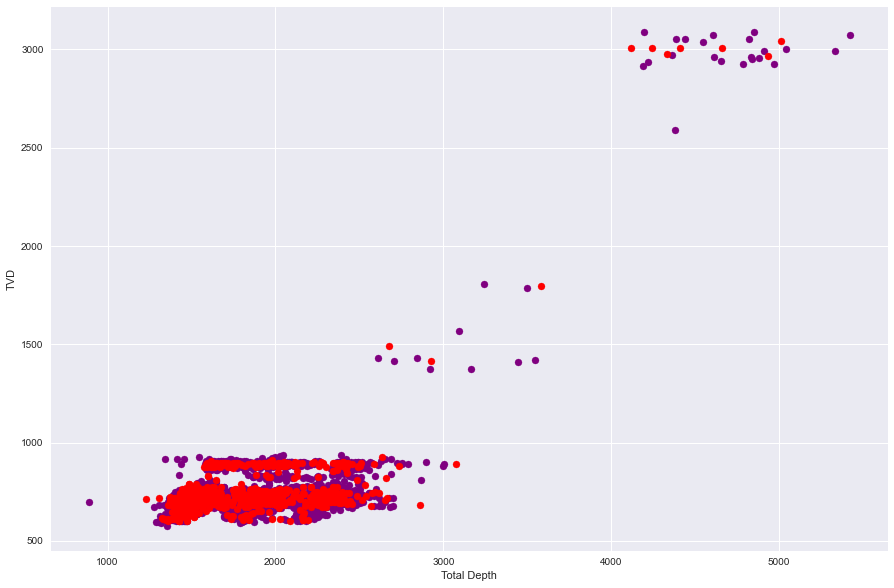

In [33]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(vik['TotalDepth'], vik['TVD'], color='purple')
plt.scatter(test_vik['TotalDepth'], back, color='red')

In [34]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_vik['TVD_predicted_kNN']=back
test_vik

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil,TVD_predicted_kNN
1511,2595449,NaN,Horizontal,Oil,1692.0,-113.143724,53.894557,-113.161216,53.895410,646.6,22,2,7,22,1,5,1,1,691.888355
1541,2610964,NaN,Horizontal,Oil,1942.0,-110.578656,51.994278,-110.560219,51.992667,711.1,4,7,10,5,12,16,1,1,744.240066
1601,2579208,NaN,Horizontal,Oil,1528.0,-113.046701,53.894090,-113.061774,53.895328,625.0,21,4,7,21,3,4,1,1,670.005550
1604,2595580,NaN,Horizontal,Oil,1834.0,-113.247570,53.981458,-113.253763,53.991619,661.9,22,6,16,22,5,4,1,1,721.347131
1621,2595577,NaN,Horizontal,Oil,1560.0,-113.165923,53.901482,-113.151316,53.902580,649.0,22,2,16,22,2,11,1,1,687.907845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,2593752,NaN,Horizontal,Oil,2060.0,-111.161530,51.912631,-111.167073,51.922555,783.0,9,14,16,9,13,4,1,1,887.368412
10422,2588281,NaN,Horizontal,Oil,1716.0,-111.175877,51.910109,-111.178837,51.917665,782.8,9,14,6,9,11,14,1,1,878.267245
10425,2588282,NaN,Horizontal,Oil,1737.0,-111.137825,51.910015,-111.140736,51.917843,784.4,9,13,8,8,7,13,1,1,878.267245
10426,2588283,NaN,Horizontal,Oil,1759.0,-111.161386,51.912631,-111.160026,51.903725,782.9,9,12,12,9,13,4,1,1,881.117611


In [35]:
#Prediction from random forest
predicted_vik_rf=rf_vik.predict(test_pred_vik)

In [36]:
import statistics as sc
back_vik_rf=predicted_vik_rf*data_vik['TVD'].std()+data_vik['TVD'].mean()

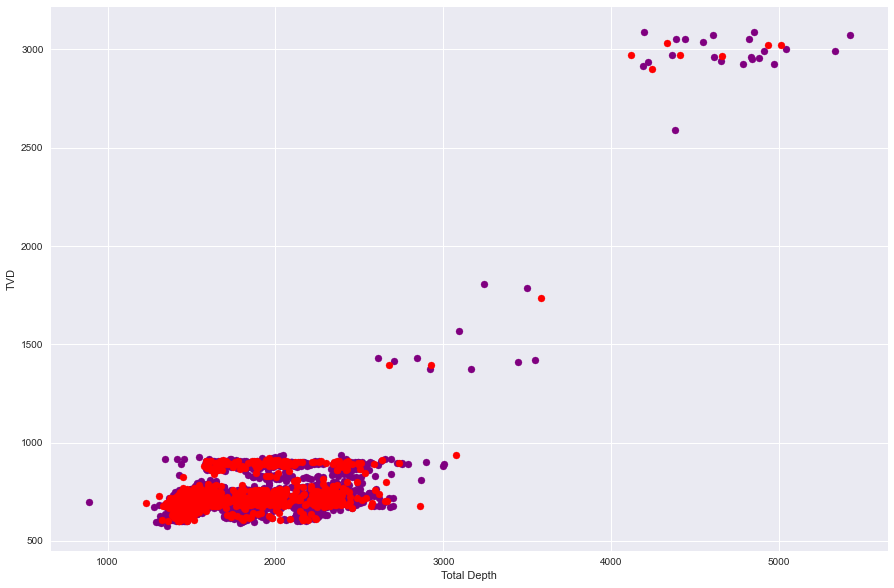

In [37]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(vik['TotalDepth'], vik['TVD'], color='purple')
plt.scatter(test_vik['TotalDepth'], back_vik_rf, color='red')

In [38]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_vik['TVD_predicted_RF']=back_vik_rf
test_vik

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil,TVD_predicted_kNN,TVD_predicted_RF
1511,2595449,NaN,Horizontal,Oil,1692.0,-113.143724,53.894557,-113.161216,53.895410,646.6,22,2,7,22,1,5,1,1,691.888355,704.381347
1541,2610964,NaN,Horizontal,Oil,1942.0,-110.578656,51.994278,-110.560219,51.992667,711.1,4,7,10,5,12,16,1,1,744.240066,741.597577
1601,2579208,NaN,Horizontal,Oil,1528.0,-113.046701,53.894090,-113.061774,53.895328,625.0,21,4,7,21,3,4,1,1,670.005550,691.171503
1604,2595580,NaN,Horizontal,Oil,1834.0,-113.247570,53.981458,-113.253763,53.991619,661.9,22,6,16,22,5,4,1,1,721.347131,711.565037
1621,2595577,NaN,Horizontal,Oil,1560.0,-113.165923,53.901482,-113.151316,53.902580,649.0,22,2,16,22,2,11,1,1,687.907845,704.059435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,2593752,NaN,Horizontal,Oil,2060.0,-111.161530,51.912631,-111.167073,51.922555,783.0,9,14,16,9,13,4,1,1,887.368412,889.894216
10422,2588281,NaN,Horizontal,Oil,1716.0,-111.175877,51.910109,-111.178837,51.917665,782.8,9,14,6,9,11,14,1,1,878.267245,890.527537
10425,2588282,NaN,Horizontal,Oil,1737.0,-111.137825,51.910015,-111.140736,51.917843,784.4,9,13,8,8,7,13,1,1,878.267245,890.576253
10426,2588283,NaN,Horizontal,Oil,1759.0,-111.161386,51.912631,-111.160026,51.903725,782.9,9,12,12,9,13,4,1,1,881.117611,890.990056


# Model Duv

In [39]:
#Variables selection for the model
duv_wells=duv[['EPAssetsId','TVD','WellProfile','WellTypeStandardised','TotalDepth','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']]
data_duv=duv_wells[duv_wells.TVD.notnull()]
data_duv.columns=['EPAssetsId','TVD','WellProfile','WellType','TotalDepth','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']
data_duv

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
7,2596716,3091.13,Horizontal,Gas,5776.0,-117.170065,54.605263,-117.196972,54.624311,789.7,22,13,5,21,7,3
11,2608501,2884.43,Directional,Gas,6803.0,-116.856043,54.584164,-116.897356,54.618240,751.7,20,13,4,19,31,10
12,2605903,2902.35,Horizontal,Gas,7770.0,-116.850398,54.568705,-116.896572,54.609718,779.2,20,12,5,19,30,9
13,2605905,2911.47,Directional,Gas,7617.0,-116.850307,54.568635,-116.897616,54.604653,779.1,20,12,4,19,30,9
16,2608703,2996.70,Horizontal,Gas,5787.0,-116.965784,54.578009,-116.998498,54.595833,787.0,20,5,5,20,33,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10161,2612072,2589.61,Directional,Oil,5380.0,-113.977547,52.288080,-113.977363,52.261803,947.2,28,17,4,28,20,13
10162,2611853,2578.50,Directional,Oil,5470.5,-113.977547,52.288170,-113.979404,52.261828,947.2,28,17,4,28,20,13
10163,2613059,2592.95,Directional,Oil,5555.0,-113.977547,52.287900,-113.973427,52.261742,947.2,28,17,3,28,20,13
10165,2614783,2624.66,Directional,Oil,5948.0,-113.995517,52.207260,-113.998674,52.238612,945.9,28,6,5,28,30,6


In [55]:
#Creating dummies for categorical variables WellProfile and WellType

duv_profile_dummies = pd.get_dummies(data_duv.WellProfile, prefix='WellProfile').iloc[:,1:]
duv_type_dummies = pd.get_dummies(data_duv.WellType, prefix='WellType').iloc[:,1:]

df_duv = pd.concat([data_duv,duv_profile_dummies,duv_type_dummies], axis=1)
df_duv

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil
7,2596716,3091.13,Horizontal,Gas,5776.0,-117.170065,54.605263,-117.196972,54.624311,789.7,22,13,5,21,7,3,1,0
11,2608501,2884.43,Directional,Gas,6803.0,-116.856043,54.584164,-116.897356,54.618240,751.7,20,13,4,19,31,10,0,0
12,2605903,2902.35,Horizontal,Gas,7770.0,-116.850398,54.568705,-116.896572,54.609718,779.2,20,12,5,19,30,9,1,0
13,2605905,2911.47,Directional,Gas,7617.0,-116.850307,54.568635,-116.897616,54.604653,779.1,20,12,4,19,30,9,0,0
16,2608703,2996.70,Horizontal,Gas,5787.0,-116.965784,54.578009,-116.998498,54.595833,787.0,20,5,5,20,33,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10161,2612072,2589.61,Directional,Oil,5380.0,-113.977547,52.288080,-113.977363,52.261803,947.2,28,17,4,28,20,13,0,1
10162,2611853,2578.50,Directional,Oil,5470.5,-113.977547,52.288170,-113.979404,52.261828,947.2,28,17,4,28,20,13,0,1
10163,2613059,2592.95,Directional,Oil,5555.0,-113.977547,52.287900,-113.973427,52.261742,947.2,28,17,3,28,20,13,0,1
10165,2614783,2624.66,Directional,Oil,5948.0,-113.995517,52.207260,-113.998674,52.238612,945.9,28,6,5,28,30,6,0,1


In [56]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
sec_duv=df_duv.iloc[:,[1,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
scale_duv=StandardScaler()
scaled_duv=scale_duv.fit_transform(sec_duv)
df_duv_sc=pd.DataFrame(scaled_duv)
df_duv_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.151222,-0.089869,-0.689186,0.779340,-0.706555,0.794159,-1.166440,0.256217,-0.550801,-0.747034,0.075604,-1.285627,-1.278809,0.815792,-0.638877
1,-0.323888,1.372765,-0.474664,0.758330,-0.502078,0.788125,-1.607181,-0.122812,-0.550801,-0.952511,-0.302810,1.076926,0.168197,-1.225802,-0.638877
2,-0.282698,2.749948,-0.470808,0.742936,-0.501543,0.779656,-1.288224,-0.122812,-0.655457,-0.747034,-0.302810,0.978487,-0.038518,0.815792,-0.638877
3,-0.261735,2.532048,-0.470745,0.742866,-0.502256,0.774622,-1.289383,-0.122812,-0.655457,-0.952511,-0.302810,0.978487,-0.038518,-1.225802,-0.638877
4,-0.065830,-0.074203,-0.549633,0.752201,-0.571104,0.765857,-1.197756,-0.122812,-1.388052,-0.747034,-0.113603,1.273806,-0.658664,0.815792,-0.638877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,-1.001547,-0.653845,1.491761,-1.528104,1.490708,-1.553738,0.660317,1.393303,-0.132175,-0.952511,1.400054,-0.005910,0.788342,-1.225802,1.565248
479,-1.027084,-0.524956,1.491761,-1.528015,1.489315,-1.553713,0.660317,1.393303,-0.132175,-0.952511,1.400054,-0.005910,0.788342,-1.225802,1.565248
480,-0.993870,-0.404613,1.491761,-1.528284,1.493394,-1.553799,0.660317,1.393303,-0.132175,-1.157988,1.400054,-0.005910,0.788342,-1.225802,1.565248
481,-0.920983,0.155090,1.479485,-1.608585,1.476164,-1.576786,0.645239,1.393303,-1.283396,-0.747034,1.400054,0.978487,-0.658664,-1.225802,1.565248


In [57]:
#Extrating feature variables for the model
X_duv=df_duv_sc.iloc[:, 1: ]
y_duv=df_duv.iloc[:, 1]
X_duv

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.089869,-0.689186,0.779340,-0.706555,0.794159,-1.166440,0.256217,-0.550801,-0.747034,0.075604,-1.285627,-1.278809,0.815792,-0.638877
1,1.372765,-0.474664,0.758330,-0.502078,0.788125,-1.607181,-0.122812,-0.550801,-0.952511,-0.302810,1.076926,0.168197,-1.225802,-0.638877
2,2.749948,-0.470808,0.742936,-0.501543,0.779656,-1.288224,-0.122812,-0.655457,-0.747034,-0.302810,0.978487,-0.038518,0.815792,-0.638877
3,2.532048,-0.470745,0.742866,-0.502256,0.774622,-1.289383,-0.122812,-0.655457,-0.952511,-0.302810,0.978487,-0.038518,-1.225802,-0.638877
4,-0.074203,-0.549633,0.752201,-0.571104,0.765857,-1.197756,-0.122812,-1.388052,-0.747034,-0.113603,1.273806,-0.658664,0.815792,-0.638877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,-0.653845,1.491761,-1.528104,1.490708,-1.553738,0.660317,1.393303,-0.132175,-0.952511,1.400054,-0.005910,0.788342,-1.225802,1.565248
479,-0.524956,1.491761,-1.528015,1.489315,-1.553713,0.660317,1.393303,-0.132175,-0.952511,1.400054,-0.005910,0.788342,-1.225802,1.565248
480,-0.404613,1.491761,-1.528284,1.493394,-1.553799,0.660317,1.393303,-0.132175,-1.157988,1.400054,-0.005910,0.788342,-1.225802,1.565248
481,0.155090,1.479485,-1.608585,1.476164,-1.576786,0.645239,1.393303,-1.283396,-0.747034,1.400054,0.978487,-0.658664,-1.225802,1.565248


# kNN Duv

In [58]:
#Using a kNN model 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from math import sqrt

rmse_val_duv = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    X_train,X_test,y_train,y_test=train_test_split(X_duv,y_duv,test_size=0.4, random_state=K)
    
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    
    training_score=model.score(X_train,y_train)
    testing_score=model.score(X_test,y_test)
   
    if testing_score > training_score:
        print("Testing : {} Training : {} Random State: {}".format(testing_score,training_score,K))
    
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val_duv.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    

RMSE value for k=  1 is: 127.91585722613479
RMSE value for k=  2 is: 113.29934880694292
RMSE value for k=  3 is: 118.55724239731971
RMSE value for k=  4 is: 112.50917801150028
RMSE value for k=  5 is: 116.37685775898781
RMSE value for k=  6 is: 142.73716256719837
RMSE value for k=  7 is: 143.18058227829886
RMSE value for k=  8 is: 135.8017233247264
RMSE value for k=  9 is: 147.6024115232193
RMSE value for k=  10 is: 133.38583971275324
RMSE value for k=  11 is: 135.25128679840861
RMSE value for k=  12 is: 130.32672388198327
RMSE value for k=  13 is: 161.64388778941787
Testing : 0.895498904089591 Training : 0.8929241315692827 Random State: 14
RMSE value for k=  14 is: 134.72497309187156
RMSE value for k=  15 is: 164.880585981315
RMSE value for k=  16 is: 168.55802873022122
Testing : 0.8878006187300825 Training : 0.8780039220263515 Random State: 17
RMSE value for k=  17 is: 146.54774472849704
RMSE value for k=  18 is: 163.7759412619327
Testing : 0.8849894409689539 Training : 0.85988301162

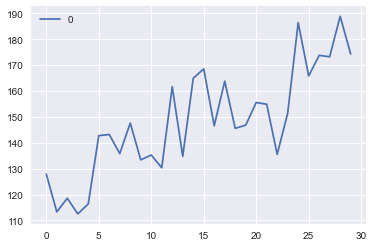

In [59]:
#plotting the rmse values against k values
curve_duv = pd.DataFrame(rmse_val_duv) #elbow curve 
curve_duv.plot()

In [60]:
#Selecting the model for the analysis
from sklearn.model_selection import train_test_split
X_train_duv,X_test_duv,y_train_duv,y_test_duv=train_test_split(X_duv,y_duv,test_size=0.4, random_state=6)
model_duv = KNeighborsRegressor(n_neighbors = 2)
model_duv.fit(X_train_duv, y_train_duv)

KNeighborsRegressor(n_neighbors=2)

In [61]:
print('Training Features Shape:', X_train_duv.shape)
print('Training Labels Shape:', y_train_duv.shape)
print('Testing Features Shape:', X_test_duv.shape)
print('Testing Labels Shape:', y_test_duv.shape)

Training Features Shape: (289, 14)
Training Labels Shape: (289,)
Testing Features Shape: (194, 14)
Testing Labels Shape: (194,)


In [62]:
model_duv.score(X_train_duv,y_train_duv)

0.9803897094627434

In [63]:
model_duv.score(X_test_duv,y_test_duv)

0.9387371895052424

In [64]:
error12 = sqrt(mean_squared_error(y_test_duv,model_duv.predict(X_test_duv)))
error12

114.1271341248728

# Random Forest-Duv

In [536]:
# Import the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate model with 1000 decision trees
rf_duv = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf_duv.fit(X_train_duv,y_train_duv);

In [537]:
rf_duv_predictions=rf_duv.predict(X_test_duv)

In [542]:
mse_duv=cross_val_score(model_duv,X_train_duv,y_train_duv,scoring='neg_mean_squared_error', cv=5)
mean_mse_duv=np.mean(mse_duv)
print(mean_mse_duv)

-0.0793348933763952


In [543]:
rf_duv.score(X_train_duv,y_train_duv)

0.9966772626047532

In [544]:
rf_duv.score(X_test_duv,y_test_duv)

0.9807245986294623

In [545]:
error2 = sqrt(mean_squared_error(y_test_duv,rf_duv_predictions))
error2

0.14714530178734597

# Preparing the prediction data

In [546]:
#Now getting the duv testing data to make predictions
test_data_duv=duv_wells[duv_wells.TVD.isnull()] #Getting the data where TVD need to be predicted
test_data_duv.columns=['EPAssetsId','TVD','WellProfile','WellType','TotalDepth','Surf_Longitude','Surf_Latitude','BH_Longitude','BH_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']
test_data_duv

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
14,2608702,NaN,Horizontal,Gas,6110.0,-116.965662,54.578063,-116.998302,54.599608,787.0,20,5,12,20,33,6
15,2614267,NaN,Directional,Gas,6106.0,-116.965540,54.578117,-116.991957,54.599699,787.0,20,5,11,20,33,6
17,2608700,NaN,Horizontal,Gas,5701.0,-116.965908,54.577954,-116.998494,54.591814,787.0,20,5,4,20,33,3
19,2592016,NaN,Horizontal,Gas,5520.0,-117.191175,54.371774,-117.158618,54.360244,881.6,22,13,7,22,23,3
49,2605862,NaN,Horizontal,Gas,6768.0,-117.353854,54.338160,-117.390310,54.357753,1044.8,23,16,3,23,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,2608355,NaN,Horizontal,Oil,5735.0,-113.904868,52.328836,-113.908146,52.360505,937.8,28,13,14,28,1,14
10105,2608354,NaN,Horizontal,Oil,5843.0,-113.905161,52.328837,-113.913395,52.360615,937.8,28,13,13,28,1,14
10154,2613135,NaN,Directional,Oil,6025.0,-114.048401,52.235466,-114.050753,52.203787,941.3,1,27,1,1,2,5
10164,2615668,NaN,Directional,Oil,5940.0,-113.995371,52.207261,-113.996846,52.238624,945.9,28,6,6,28,30,6


In [547]:
#Creating dummies for categorical variables WellProfile and WellType

#well_formation_dummies_test = pd.get_dummies(test_data.Formation, prefix='Formation').iloc[:,1:]
duv_profile_dummies_test = pd.get_dummies(test_data_duv.WellProfile, prefix='WellProfile').iloc[:,1:]
duv_type_dummies_test = pd.get_dummies(test_data_duv.WellType, prefix='WellType').iloc[:,1:]

test_duv = pd.concat([test_data_duv, duv_profile_dummies_test,duv_type_dummies_test], axis=1)
test_duv

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil
14,2608702,NaN,Horizontal,Gas,6110.0,-116.965662,54.578063,-116.998302,54.599608,787.0,20,5,12,20,33,6,1,0
15,2614267,NaN,Directional,Gas,6106.0,-116.965540,54.578117,-116.991957,54.599699,787.0,20,5,11,20,33,6,0,0
17,2608700,NaN,Horizontal,Gas,5701.0,-116.965908,54.577954,-116.998494,54.591814,787.0,20,5,4,20,33,3,1,0
19,2592016,NaN,Horizontal,Gas,5520.0,-117.191175,54.371774,-117.158618,54.360244,881.6,22,13,7,22,23,3,1,0
49,2605862,NaN,Horizontal,Gas,6768.0,-117.353854,54.338160,-117.390310,54.357753,1044.8,23,16,3,23,3,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,2608355,NaN,Horizontal,Oil,5735.0,-113.904868,52.328836,-113.908146,52.360505,937.8,28,13,14,28,1,14,1,1
10105,2608354,NaN,Horizontal,Oil,5843.0,-113.905161,52.328837,-113.913395,52.360615,937.8,28,13,13,28,1,14,1,1
10154,2613135,NaN,Directional,Oil,6025.0,-114.048401,52.235466,-114.050753,52.203787,941.3,1,27,1,1,2,5,0,1
10164,2615668,NaN,Directional,Oil,5940.0,-113.995371,52.207261,-113.996846,52.238624,945.9,28,6,6,28,30,6,0,1


In [548]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
tes_duv=test_duv.iloc[:,4:19]
scale_test_duv=StandardScaler()
scaled_test_duv=scale_test_duv.fit_transform(tes_duv)
test_pred_duv=pd.DataFrame(scaled_test_duv)
test_pred_duv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.293869,-0.492111,0.711526,-0.515012,0.731184,-1.153325,-0.163657,-1.421360,0.610094,-0.150191,1.221345,-0.670752,0.819836,-0.577350
1,0.287848,-0.492025,0.711584,-0.510519,0.731281,-1.153325,-0.163657,-1.421360,0.408704,-0.150191,1.221345,-0.670752,-1.219756,-0.577350
2,-0.321783,-0.492286,0.711410,-0.515148,0.722849,-1.153325,-0.163657,-1.421360,-1.001029,-0.150191,1.221345,-1.316192,0.819836,-0.577350
3,-0.594235,-0.652015,0.490597,-0.628553,0.475201,-0.162988,0.236175,-0.587550,-0.396858,0.252954,0.336878,-1.316192,0.819836,-0.577350
4,1.284331,-0.767365,0.454598,-0.792644,0.472537,1.545500,0.436091,-0.274871,-1.202419,0.454526,-1.432056,1.480716,0.819836,-0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-0.270604,1.678191,-1.697326,1.673529,-1.663380,0.425352,1.435671,-0.587550,1.012875,1.462388,-1.608950,1.050423,0.819836,1.732051
200,-0.108036,1.677983,-1.697325,1.669812,-1.663262,0.425352,1.435671,-0.587550,0.811485,1.462388,-1.608950,1.050423,0.819836,1.732051
201,0.165922,1.576417,-1.797323,1.572530,-1.830979,0.461992,-3.962060,0.871617,-1.605200,-3.980066,-1.520503,-0.885899,-1.219756,1.732051
202,0.037975,1.614018,-1.827529,1.610709,-1.793723,0.510148,1.435671,-1.317133,-0.598248,1.462388,0.956005,-0.670752,-1.219756,1.732051


In [549]:
#Prediction on the testing set
predicted_duv=model_duv.predict(test_pred_duv)

In [550]:
import statistics as sc
back_duv=predicted_duv*data_duv['TVD'].std()+data_duv['TVD'].mean()

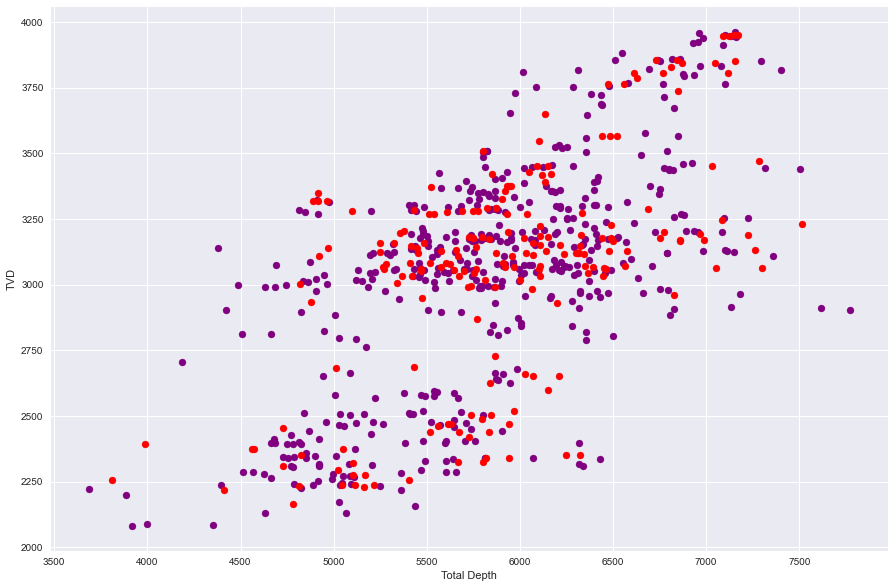

In [551]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(duv['TotalDepth'], duv['TVD'], color='purple')
plt.scatter(test_duv['TotalDepth'], back_duv, color='red')

In [552]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_duv['TVD_predicted_kNN']=back_duv
test_duv

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil,TVD_predicted_kNN
14,2608702,NaN,Horizontal,Gas,6110.0,-116.965662,54.578063,-116.998302,54.599608,787.0,20,5,12,20,33,6,1,0,3070.671952
15,2614267,NaN,Directional,Gas,6106.0,-116.965540,54.578117,-116.991957,54.599699,787.0,20,5,11,20,33,6,0,0,3150.084202
17,2608700,NaN,Horizontal,Gas,5701.0,-116.965908,54.577954,-116.998494,54.591814,787.0,20,5,4,20,33,3,1,0,3050.841413
19,2592016,NaN,Horizontal,Gas,5520.0,-117.191175,54.371774,-117.158618,54.360244,881.6,22,13,7,22,23,3,1,0,3370.412403
49,2605862,NaN,Horizontal,Gas,6768.0,-117.353854,54.338160,-117.390310,54.357753,1044.8,23,16,3,23,3,16,1,0,3807.084679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,2608355,NaN,Horizontal,Oil,5735.0,-113.904868,52.328836,-113.908146,52.360505,937.8,28,13,14,28,1,14,1,1,2505.076146
10105,2608354,NaN,Horizontal,Oil,5843.0,-113.905161,52.328837,-113.913395,52.360615,937.8,28,13,13,28,1,14,1,1,2505.076146
10154,2613135,NaN,Directional,Oil,6025.0,-114.048401,52.235466,-114.050753,52.203787,941.3,1,27,1,1,2,5,0,1,2659.506094
10164,2615668,NaN,Directional,Oil,5940.0,-113.995371,52.207261,-113.996846,52.238624,945.9,28,6,6,28,30,6,0,1,2469.434230


In [553]:
#Prediction from random forest
predicted_duv_rf=rf_duv.predict(test_pred_duv)

In [554]:
import statistics as sc
back_duv_rf=predicted_duv_rf*data_duv['TVD'].std()+data_duv['TVD'].mean()

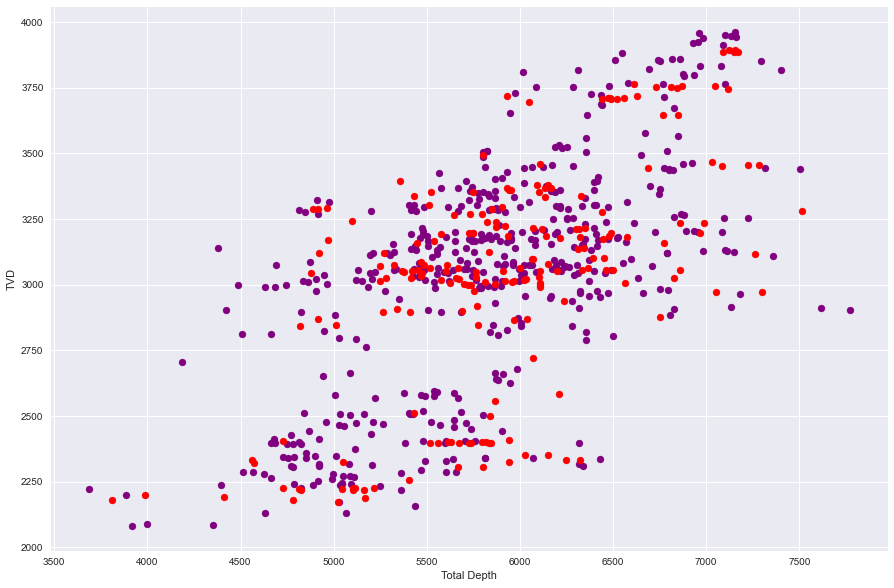

In [555]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(duv['TotalDepth'], duv['TVD'], color='purple')
plt.scatter(test_duv['TotalDepth'], back_duv_rf, color='red')

In [556]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_duv['TVD_predicted_RF']=back_duv_rf
test_duv

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil,TVD_predicted_kNN,TVD_predicted_RF
14,2608702,NaN,Horizontal,Gas,6110.0,-116.965662,54.578063,-116.998302,54.599608,787.0,20,5,12,20,33,6,1,0,3070.671952,2999.912774
15,2614267,NaN,Directional,Gas,6106.0,-116.965540,54.578117,-116.991957,54.599699,787.0,20,5,11,20,33,6,0,0,3150.084202,2990.566384
17,2608700,NaN,Horizontal,Gas,5701.0,-116.965908,54.577954,-116.998494,54.591814,787.0,20,5,4,20,33,3,1,0,3050.841413,3003.384420
19,2592016,NaN,Horizontal,Gas,5520.0,-117.191175,54.371774,-117.158618,54.360244,881.6,22,13,7,22,23,3,1,0,3370.412403,3352.036601
49,2605862,NaN,Horizontal,Gas,6768.0,-117.353854,54.338160,-117.390310,54.357753,1044.8,23,16,3,23,3,16,1,0,3807.084679,3647.969008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,2608355,NaN,Horizontal,Oil,5735.0,-113.904868,52.328836,-113.908146,52.360505,937.8,28,13,14,28,1,14,1,1,2505.076146,2397.596616
10105,2608354,NaN,Horizontal,Oil,5843.0,-113.905161,52.328837,-113.913395,52.360615,937.8,28,13,13,28,1,14,1,1,2505.076146,2397.489655
10154,2613135,NaN,Directional,Oil,6025.0,-114.048401,52.235466,-114.050753,52.203787,941.3,1,27,1,1,2,5,0,1,2659.506094,2352.817146
10164,2615668,NaN,Directional,Oil,5940.0,-113.995371,52.207261,-113.996846,52.238624,945.9,28,6,6,28,30,6,0,1,2469.434230,2409.245831


# Model Monteny

In [557]:
#Variables selection for the model monteny
mon_wells=mon[['EPAssetsId','TVD','WellProfile','WellTypeStandardised','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']]
data_mon=mon_wells[mon_wells.TVD.notnull()]
data_mon.columns=['EPAssetsId','TVD','WellProfile','WellType','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']
data_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
1,2593278,1954.58,Horizontal,Oil,3607.0,-117.527042,54.737446,770.8,24,27,5,24,26,4
2,2579437,1940.06,Horizontal,Oil,3502.0,-117.559923,54.730864,759.4,24,22,16,24,21,16
3,2591761,1945.01,Horizontal,Oil,3491.0,-117.560141,54.730703,759.8,24,22,9,24,21,16
4,2587302,1956.34,Horizontal,Oil,3578.0,-117.561283,54.723339,767.7,24,22,8,24,21,8
5,2600942,1911.62,Horizontal,Oil,3659.0,-117.639433,54.787071,725.0,24,6,12,24,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2610681,1452.10,Directional,Oil,3153.0,-116.868207,55.012183,727.8,19,31,11,19,32,4
9869,2610389,2149.02,Directional,Oil,2231.0,-116.853586,54.353492,879.0,20,12,15,20,12,16
9893,2611356,2196.04,Directional,Oil,2288.0,-116.973326,54.343247,864.0,20,7,8,20,8,4
9894,2610369,2188.93,Directional,Oil,2386.0,-116.907139,54.332684,883.4,20,3,16,20,3,8


In [558]:
#Creating dummies for categorical variables WellProfile and WellType

mon_profile_dummies = pd.get_dummies(data_mon.WellProfile, prefix='WellProfile').iloc[:,1:]
mon_type_dummies = pd.get_dummies(data_mon.WellType, prefix='WellType').iloc[:,1:]

df_mon = pd.concat([data_mon,mon_profile_dummies,mon_type_dummies], axis=1)
df_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellProfile_Vertical,WellType_Oil
1,2593278,1954.58,Horizontal,Oil,3607.0,-117.527042,54.737446,770.8,24,27,5,24,26,4,1,0,1
2,2579437,1940.06,Horizontal,Oil,3502.0,-117.559923,54.730864,759.4,24,22,16,24,21,16,1,0,1
3,2591761,1945.01,Horizontal,Oil,3491.0,-117.560141,54.730703,759.8,24,22,9,24,21,16,1,0,1
4,2587302,1956.34,Horizontal,Oil,3578.0,-117.561283,54.723339,767.7,24,22,8,24,21,8,1,0,1
5,2600942,1911.62,Horizontal,Oil,3659.0,-117.639433,54.787071,725.0,24,6,12,24,7,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,2610681,1452.10,Directional,Oil,3153.0,-116.868207,55.012183,727.8,19,31,11,19,32,4,0,0,1
9869,2610389,2149.02,Directional,Oil,2231.0,-116.853586,54.353492,879.0,20,12,15,20,12,16,0,0,1
9893,2611356,2196.04,Directional,Oil,2288.0,-116.973326,54.343247,864.0,20,7,8,20,8,4,0,0,1
9894,2610369,2188.93,Directional,Oil,2386.0,-116.907139,54.332684,883.4,20,3,16,20,3,8,0,0,1


In [559]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
sec_mon=df_mon.iloc[:,[1,4,5,6,7,8,9,10,11,12,13,14,15,16]]
scale_mon=StandardScaler()
scaled_mon=scale_mon.fit_transform(sec_mon)
df_mon=pd.DataFrame(scaled_mon)
df_mon

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.994587,-1.382822,1.362987,-0.359167,-0.565162,1.952623,0.923028,-0.777787,1.951089,0.887851,-0.945710,0.774252,-0.064739,1.431204
1,-1.018590,-1.482012,1.322262,-0.371085,-0.652357,1.952623,0.421674,1.424077,1.951089,0.419078,1.493387,0.774252,-0.064739,1.431204
2,-1.010407,-1.492403,1.321992,-0.371376,-0.649297,1.952623,0.421674,0.022891,1.951089,0.419078,1.493387,0.774252,-0.064739,1.431204
3,-0.991678,-1.410217,1.320578,-0.384710,-0.588873,1.952623,0.421674,-0.177279,1.951089,0.419078,-0.132678,0.774252,-0.064739,1.431204
4,-1.065604,-1.333700,1.223783,-0.269315,-0.915471,1.952623,-1.182661,0.623399,1.951089,-0.893486,0.070580,0.774252,-0.064739,1.431204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,-1.825233,-1.811699,2.179000,0.138279,-0.894054,1.244491,1.324112,0.423230,1.241624,1.450379,-0.945710,-1.291569,-0.064739,1.431204
1194,-0.673160,-2.682678,2.197109,-1.054365,0.262424,1.386118,-0.581036,1.223907,1.383517,-0.424713,1.493387,-1.291569,-0.064739,1.431204
1195,-0.595432,-2.628832,2.048803,-1.072915,0.147694,1.386118,-1.082390,-0.177279,1.383517,-0.799731,-0.945710,-1.291569,-0.064739,1.431204
1196,-0.607185,-2.536255,2.130780,-1.092041,0.296078,1.386118,-1.483474,1.424077,1.383517,-1.268504,-0.132678,-1.291569,-0.064739,1.431204


In [560]:
#Extrating feature variables for the model
X_mon=df_mon.iloc[:, 1: ]
y_mon=df_mon.iloc[:, 0]
X_mon

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.382822,1.362987,-0.359167,-0.565162,1.952623,0.923028,-0.777787,1.951089,0.887851,-0.945710,0.774252,-0.064739,1.431204
1,-1.482012,1.322262,-0.371085,-0.652357,1.952623,0.421674,1.424077,1.951089,0.419078,1.493387,0.774252,-0.064739,1.431204
2,-1.492403,1.321992,-0.371376,-0.649297,1.952623,0.421674,0.022891,1.951089,0.419078,1.493387,0.774252,-0.064739,1.431204
3,-1.410217,1.320578,-0.384710,-0.588873,1.952623,0.421674,-0.177279,1.951089,0.419078,-0.132678,0.774252,-0.064739,1.431204
4,-1.333700,1.223783,-0.269315,-0.915471,1.952623,-1.182661,0.623399,1.951089,-0.893486,0.070580,0.774252,-0.064739,1.431204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,-1.811699,2.179000,0.138279,-0.894054,1.244491,1.324112,0.423230,1.241624,1.450379,-0.945710,-1.291569,-0.064739,1.431204
1194,-2.682678,2.197109,-1.054365,0.262424,1.386118,-0.581036,1.223907,1.383517,-0.424713,1.493387,-1.291569,-0.064739,1.431204
1195,-2.628832,2.048803,-1.072915,0.147694,1.386118,-1.082390,-0.177279,1.383517,-0.799731,-0.945710,-1.291569,-0.064739,1.431204
1196,-2.536255,2.130780,-1.092041,0.296078,1.386118,-1.483474,1.424077,1.383517,-1.268504,-0.132678,-1.291569,-0.064739,1.431204


# kNN Montney

In [561]:
#Using a kNN model 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from math import sqrt

rmse_val_mon = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    X_train,X_test,y_train,y_test=train_test_split(X_mon,y_mon,test_size=0.4, random_state=K)
    
    model_mon_test = KNeighborsRegressor(n_neighbors = K)
    model_mon_test.fit(X_train, y_train)  #fit the model
    
    training_score=model_mon_test.score(X_train,y_train)
    testing_score=model_mon_test.score(X_test,y_test)
   
    if testing_score > training_score:
        print("Testing : {} Training : {} Random State: {}".format(testing_score,training_score,K))
    
    pred=model_mon_test.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val_mon.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    

RMSE value for k=  1 is: 0.2579710928443246
RMSE value for k=  2 is: 0.26456407028387685
RMSE value for k=  3 is: 0.26462748040316475
RMSE value for k=  4 is: 0.23851693441142374
RMSE value for k=  5 is: 0.24535564167913723
RMSE value for k=  6 is: 0.25271808761534076
RMSE value for k=  7 is: 0.2607207610817432
RMSE value for k=  8 is: 0.25447165741125866
RMSE value for k=  9 is: 0.24934240109176978
RMSE value for k=  10 is: 0.24618668086635345
RMSE value for k=  11 is: 0.2591483026910027
RMSE value for k=  12 is: 0.2578421417269914
RMSE value for k=  13 is: 0.2493590155616633
RMSE value for k=  14 is: 0.2664428890829966
RMSE value for k=  15 is: 0.26698230672552553
RMSE value for k=  16 is: 0.2621370669305492
RMSE value for k=  17 is: 0.26568299203444845
Testing : 0.9457671493227247 Training : 0.9312614066462084 Random State: 18
RMSE value for k=  18 is: 0.24944810370631904
Testing : 0.9455350327046895 Training : 0.9308015956324832 Random State: 19
RMSE value for k=  19 is: 0.24191975

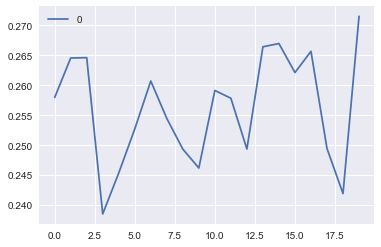

In [562]:
#plotting the rmse values against k values
curve_mon = pd.DataFrame(rmse_val_mon) #elbow curve 
curve_mon.plot()

In [563]:
#Selecting the model for the analysis
from sklearn.model_selection import train_test_split
X_train_mon,X_test_mon,y_train_mon,y_test_mon=train_test_split(X_mon,y_mon,test_size=0.3, random_state=15)
model_mon = KNeighborsRegressor(n_neighbors = 2)
model_mon.fit(X_train_mon, y_train_mon)

KNeighborsRegressor(n_neighbors=2)

In [564]:
print('Training Features Shape:', X_train_mon.shape)
print('Training Labels Shape:', y_train_mon.shape)
print('Testing Features Shape:', X_test_mon.shape)
print('Testing Labels Shape:', y_test_mon.shape)

Training Features Shape: (838, 13)
Training Labels Shape: (838,)
Testing Features Shape: (360, 13)
Testing Labels Shape: (360,)


In [565]:
model_mon.score(X_train_mon,y_train_mon)

0.9860211097773689

In [566]:
model_mon.score(X_test_mon,y_test_mon)

0.8900701038826773

# Random Forest-Montney

#Using a kNN model 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
from math import sqrt
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    X_train,X_test,y_train,y_test=train_test_split(X_mon,y_mon,test_size=0.4, random_state=K)
    
    rf_mon = RandomForestRegressor(n_estimators = 1000, random_state = K)
    rf_mon.fit(X_train, y_train)  #fit the model
    
    training_score=model.score(X_train,y_train)
    testing_score=model.score(X_test,y_test)
   
    if testing_score > training_score:
        print("Testing : {} Training : {} Random State: {}".format(testing_score,training_score,K))
    
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    

In [567]:
# Import the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate model with 1000 decision trees
rf_mon = RandomForestRegressor(n_estimators = 1000, random_state = 6)
# Train the model on training data
rf_mon.fit(X_train_mon,y_train_mon);

In [568]:
rf_mon_predictions=rf_mon.predict(X_test_mon)

In [569]:
mse_mon=cross_val_score(model_mon,X_train_mon,y_train_mon,scoring='neg_mean_squared_error', cv=5)
mean_mse_mon=np.mean(mse_mon)
print(mean_mse_mon)

-0.06014172469022459


In [570]:
rf_mon.score(X_train_mon,y_train_mon)

0.9980646618243018

In [571]:
rf_mon.score(X_test_mon,y_test_mon)

0.9747251417723646

In [572]:
from sklearn import metrics
error3 = metrics.mean_absolute_error(y_test_mon,rf_mon_predictions)
error3

0.07685169668778495

# Prediction data prep

In [573]:
#Now getting the duv testing data to make predictions
test_data_mon=mon_wells[mon_wells.TVD.isnull()] #Getting the data where TVD need to be predicted
test_data_mon.columns=['EPAssetsId','TVD','WellProfile','WellType','TotalDepth','Surf_Longitude','Surf_Latitude','KBElevation','BH_Range','BH_Section','BH_LSD','Surf_Range','Surf_Section','Surf_LSD']
test_data_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
0,2587301,NaN,Horizontal,Oil,3677.0,-117.529866,54.747632,764.8,24,27,12,24,26,13
8,2608978,NaN,Horizontal,Oil,3508.0,-117.482119,54.745328,807.4,23,30,3,24,25,16
23,2603236,NaN,Horizontal,Oil,4368.0,-117.627506,54.622943,898.9,24,17,3,24,18,5
26,2590297,NaN,Horizontal,Oil,4363.0,-117.567282,54.613129,906.5,24,10,16,24,9,10
31,2600589,NaN,Horizontal,Oil,4447.0,-117.455580,54.671480,870.3,23,28,12,23,31,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9469,40927,NaN,Horizontal,Gas,3805.0,-122.727844,57.167192,1142.5,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
9824,2615998,NaN,Directional,Gas,5670.0,-119.219587,55.215877,839.9,9,13,12,8,7,3
9828,2606857,NaN,Horizontal,Gas,5395.0,-119.229105,55.187966,786.7,9,1,12,8,31,4
9832,2610376,NaN,Horizontal,Gas,5152.0,-119.229105,55.188056,787.1,9,1,5,8,31,4


In [574]:
test_data_mon=test_data_mon.drop(test_data_mon[test_data_mon.BH_Range=='Not Applicable'].index)
test_data_mon=test_data_mon.drop(test_data_mon[test_data_mon.Surf_LSD=='Not Applicable'].index) 
test_data_mon=test_data_mon.drop(test_data_mon[test_data_mon.Surf_Section=='Not Applicable'].index)
test_data_mon=test_data_mon.drop(test_data_mon[test_data_mon.Surf_Range=='Not Applicable'].index)
test_data_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD
0,2587301,NaN,Horizontal,Oil,3677.0,-117.529866,54.747632,764.8,24,27,12,24,26,13
8,2608978,NaN,Horizontal,Oil,3508.0,-117.482119,54.745328,807.4,23,30,3,24,25,16
23,2603236,NaN,Horizontal,Oil,4368.0,-117.627506,54.622943,898.9,24,17,3,24,18,5
26,2590297,NaN,Horizontal,Oil,4363.0,-117.567282,54.613129,906.5,24,10,16,24,9,10
31,2600589,NaN,Horizontal,Oil,4447.0,-117.455580,54.671480,870.3,23,28,12,23,31,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,39606,NaN,Horizontal,Gas,3662.0,-121.033258,56.122075,659.0,20,22,13,20,22,8
9824,2615998,NaN,Directional,Gas,5670.0,-119.219587,55.215877,839.9,9,13,12,8,7,3
9828,2606857,NaN,Horizontal,Gas,5395.0,-119.229105,55.187966,786.7,9,1,12,8,31,4
9832,2610376,NaN,Horizontal,Gas,5152.0,-119.229105,55.188056,787.1,9,1,5,8,31,4


In [575]:
#Creating dummies for categorical variables WellProfile and WellType

#well_formation_dummies_test = pd.get_dummies(test_data.Formation, prefix='Formation').iloc[:,1:]
mon_profile_dummies_test = pd.get_dummies(test_data_mon.WellProfile, prefix='WellProfile').iloc[:,1:]
mon_type_dummies_test = pd.get_dummies(test_data_mon.WellType, prefix='WellType').iloc[:,1:]

test_mon = pd.concat([test_data_mon, mon_profile_dummies_test,mon_type_dummies_test], axis=1)
test_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellProfile_Vertical,WellType_Oil
0,2587301,NaN,Horizontal,Oil,3677.0,-117.529866,54.747632,764.8,24,27,12,24,26,13,1,0,1
8,2608978,NaN,Horizontal,Oil,3508.0,-117.482119,54.745328,807.4,23,30,3,24,25,16,1,0,1
23,2603236,NaN,Horizontal,Oil,4368.0,-117.627506,54.622943,898.9,24,17,3,24,18,5,1,0,1
26,2590297,NaN,Horizontal,Oil,4363.0,-117.567282,54.613129,906.5,24,10,16,24,9,10,1,0,1
31,2600589,NaN,Horizontal,Oil,4447.0,-117.455580,54.671480,870.3,23,28,12,23,31,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,39606,NaN,Horizontal,Gas,3662.0,-121.033258,56.122075,659.0,20,22,13,20,22,8,1,0,0
9824,2615998,NaN,Directional,Gas,5670.0,-119.219587,55.215877,839.9,9,13,12,8,7,3,0,0,0
9828,2606857,NaN,Horizontal,Gas,5395.0,-119.229105,55.187966,786.7,9,1,12,8,31,4,1,0,0
9832,2610376,NaN,Horizontal,Gas,5152.0,-119.229105,55.188056,787.1,9,1,5,8,31,4,1,0,0


In [576]:
#Taking features and standardizing them
from sklearn.preprocessing import StandardScaler
tes_mon=test_mon.iloc[:,4:19]
scale_test_mon=StandardScaler()
scaled_test_mon=scale_test_mon.fit_transform(tes_mon)
test_pred_mon=pd.DataFrame(scaled_test_mon)
test_pred_mon

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.213921,0.164007,-0.111990,-0.209552,1.689436,0.998953,0.636570,1.694702,0.879572,0.971944,0.345126,-0.024529,2.355259
1,-1.423569,0.168682,-0.112475,0.220218,1.496275,1.296973,-1.174062,1.694702,0.779227,1.594572,0.345126,-0.024529,2.355259
2,-0.356722,0.154449,-0.138255,1.143316,1.689436,0.005555,-1.174062,1.694702,0.076812,-0.688398,0.345126,-0.024529,2.355259
3,-0.362924,0.160344,-0.140322,1.219989,1.689436,-0.689823,1.441295,1.694702,-0.826292,0.349316,0.345126,-0.024529,2.355259
4,-0.258721,0.171280,-0.128031,0.854785,1.496275,1.098293,0.636570,1.500858,1.381297,0.141773,0.345126,-0.024529,2.355259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,-1.232529,-0.178970,0.177531,-1.276916,0.916791,0.502254,0.837751,0.919328,0.478192,-0.065770,0.345126,-0.024529,-0.424582
1659,1.258436,-0.001414,-0.013356,0.548094,-1.207985,-0.391804,0.636570,-1.406792,-1.026982,-1.103483,-2.897496,-0.024529,-0.424582
1660,0.917293,-0.002346,-0.019235,0.011386,-1.207985,-1.583881,0.636570,-1.406792,1.381297,-0.895941,0.345126,-0.024529,-0.424582
1661,0.615846,-0.002346,-0.019216,0.015422,-1.207985,-1.583881,-0.771699,-1.406792,1.381297,-0.895941,0.345126,-0.024529,-0.424582


In [577]:
#Prediction on the testing set
predicted_mon=model_mon.predict(test_pred_mon)

In [578]:
import statistics as sc
back_mon=predicted_mon*data_mon['TVD'].std()+data_mon['TVD'].mean()

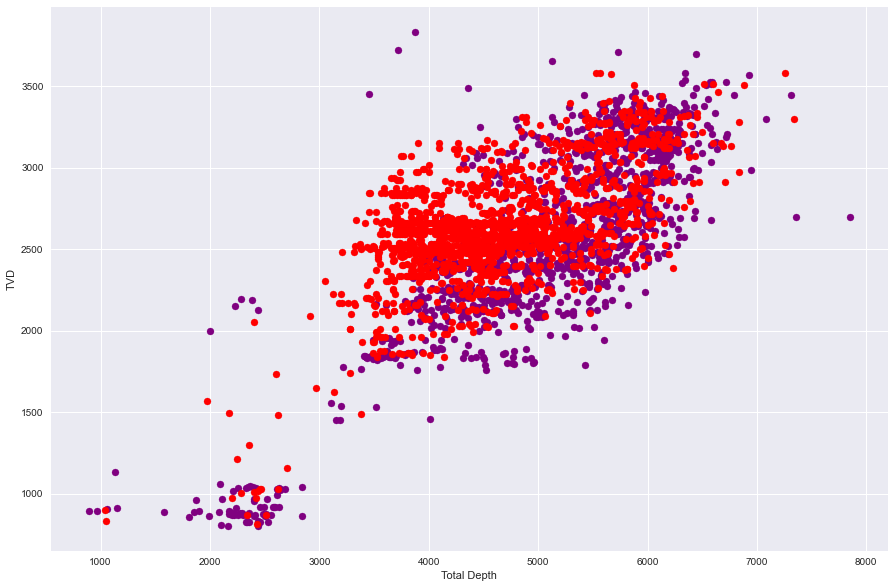

In [579]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(mon['TotalDepth'], mon['TVD'], color='purple')
plt.scatter(test_mon['TotalDepth'], back_mon, color='red')

In [580]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_mon['TVD_predicted_kNN']=back_mon
test_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellProfile_Vertical,WellType_Oil,TVD_predicted_kNN
0,2587301,NaN,Horizontal,Oil,3677.0,-117.529866,54.747632,764.8,24,27,12,24,26,13,1,0,1,2258.395668
8,2608978,NaN,Horizontal,Oil,3508.0,-117.482119,54.745328,807.4,23,30,3,24,25,16,1,0,1,2100.899922
23,2603236,NaN,Horizontal,Oil,4368.0,-117.627506,54.622943,898.9,24,17,3,24,18,5,1,0,1,2250.477363
26,2590297,NaN,Horizontal,Oil,4363.0,-117.567282,54.613129,906.5,24,10,16,24,9,10,1,0,1,2213.376875
31,2600589,NaN,Horizontal,Oil,4447.0,-117.455580,54.671480,870.3,23,28,12,23,31,9,1,0,1,2258.395668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,39606,NaN,Horizontal,Gas,3662.0,-121.033258,56.122075,659.0,20,22,13,20,22,8,1,0,0,2507.014454
9824,2615998,NaN,Directional,Gas,5670.0,-119.219587,55.215877,839.9,9,13,12,8,7,3,0,0,0,3126.683134
9828,2606857,NaN,Horizontal,Gas,5395.0,-119.229105,55.187966,786.7,9,1,12,8,31,4,1,0,0,3152.708999
9832,2610376,NaN,Horizontal,Gas,5152.0,-119.229105,55.188056,787.1,9,1,5,8,31,4,1,0,0,2802.262705


In [581]:
#Prediction from random forest
predicted_mon_rf=rf_mon.predict(test_pred_mon)

In [582]:
import statistics as sc
back_mon_rf=predicted_mon_rf*data_mon['TVD'].std()+data_mon['TVD'].mean()

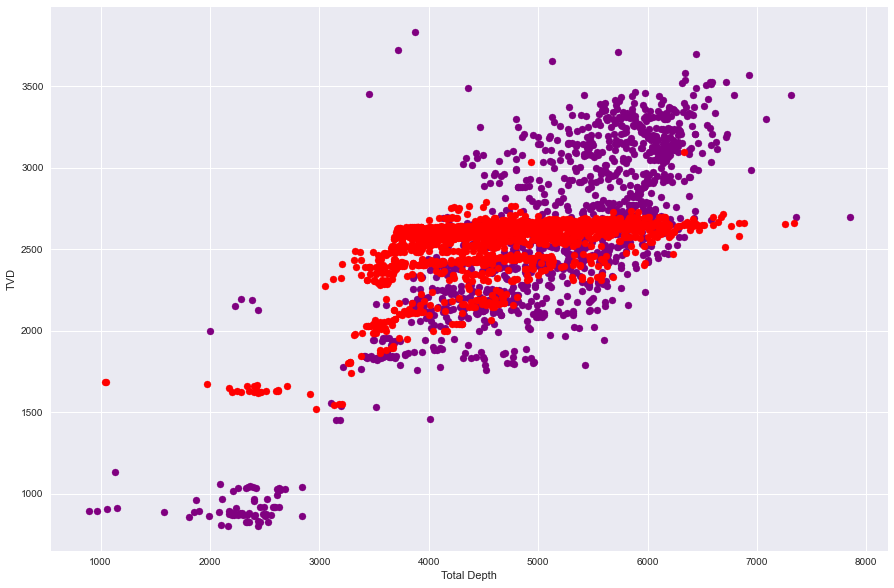

In [583]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Depth')
plt.ylabel('TVD')
plt.scatter(mon['TotalDepth'], mon['TVD'], color='purple')
plt.scatter(test_mon['TotalDepth'], back_mon_rf, color='red')

In [584]:
#Putting the predicted TVD in the dataframe as TVD_predicted
test_mon['TVD_predicted_RF']=back_mon_rf
test_mon

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,KBElevation,BH_Range,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellProfile_Vertical,WellType_Oil,TVD_predicted_kNN,TVD_predicted_RF
0,2587301,NaN,Horizontal,Oil,3677.0,-117.529866,54.747632,764.8,24,27,12,24,26,13,1,0,1,2258.395668,2064.583751
8,2608978,NaN,Horizontal,Oil,3508.0,-117.482119,54.745328,807.4,23,30,3,24,25,16,1,0,1,2100.899922,2068.025618
23,2603236,NaN,Horizontal,Oil,4368.0,-117.627506,54.622943,898.9,24,17,3,24,18,5,1,0,1,2250.477363,2252.987280
26,2590297,NaN,Horizontal,Oil,4363.0,-117.567282,54.613129,906.5,24,10,16,24,9,10,1,0,1,2213.376875,2275.743690
31,2600589,NaN,Horizontal,Oil,4447.0,-117.455580,54.671480,870.3,23,28,12,23,31,9,1,0,1,2258.395668,2239.913663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,39606,NaN,Horizontal,Gas,3662.0,-121.033258,56.122075,659.0,20,22,13,20,22,8,1,0,0,2507.014454,2314.644869
9824,2615998,NaN,Directional,Gas,5670.0,-119.219587,55.215877,839.9,9,13,12,8,7,3,0,0,0,3126.683134,2663.233658
9828,2606857,NaN,Horizontal,Gas,5395.0,-119.229105,55.187966,786.7,9,1,12,8,31,4,1,0,0,3152.708999,2644.624939
9832,2610376,NaN,Horizontal,Gas,5152.0,-119.229105,55.188056,787.1,9,1,5,8,31,4,1,0,0,2802.262705,2647.550140


# Combining all the predictions

In [585]:
com_data=pd.concat([test_vik,test_duv,test_mon],axis=0)
com_data

,EPAssetsId,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,KBElevation,...,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil,TVD_predicted_kNN,TVD_predicted_RF,WellProfile_Vertical
1511,2595449,NaN,Horizontal,Oil,1692.0,-113.143724,53.894557,-113.161216,53.895410,646.6,...,2,7,22,1,5,1,1,691.888355,704.381347,NaN
1541,2610964,NaN,Horizontal,Oil,1942.0,-110.578656,51.994278,-110.560219,51.992667,711.1,...,7,10,5,12,16,1,1,744.240066,741.597577,NaN
1601,2579208,NaN,Horizontal,Oil,1528.0,-113.046701,53.894090,-113.061774,53.895328,625.0,...,4,7,21,3,4,1,1,670.005550,691.171503,NaN
1604,2595580,NaN,Horizontal,Oil,1834.0,-113.247570,53.981458,-113.253763,53.991619,661.9,...,6,16,22,5,4,1,1,721.347131,711.565037,NaN
1621,2595577,NaN,Horizontal,Oil,1560.0,-113.165923,53.901482,-113.151316,53.902580,649.0,...,2,16,22,2,11,1,1,687.907845,704.059435,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,39606,NaN,Horizontal,Gas,3662.0,-121.033258,56.122075,NaN,NaN,659.0,...,22,13,20,22,8,1,0,2507.014454,2314.644869,0.0
9824,2615998,NaN,Directional,Gas,5670.0,-119.219587,55.215877,NaN,NaN,839.9,...,13,12,8,7,3,0,0,3126.683134,2663.233658,0.0
9828,2606857,NaN,Horizontal,Gas,5395.0,-119.229105,55.187966,NaN,NaN,786.7,...,1,12,8,31,4,1,0,3152.708999,2644.624939,0.0
9832,2610376,NaN,Horizontal,Gas,5152.0,-119.229105,55.188056,NaN,NaN,787.1,...,1,5,8,31,4,1,0,2802.262705,2647.550140,0.0


In [586]:
#Getting the data from the submission list for the EPAssetsID
sub_list=pd.read_csv('Submission_Sample.csv')

In [587]:
#Merging the test data and submission data to get the required predicted TVD's
data_merge=pd.merge(sub_list,com_data, on='EPAssetsId')
data_merge


,EPAssetsId,TVD_Sample_submission,TVD,WellProfile,WellType,TotalDepth,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,...,BH_Section,BH_LSD,Surf_Range,Surf_Section,Surf_LSD,WellProfile_Horizontal,WellType_Oil,TVD_predicted_kNN,TVD_predicted_RF,WellProfile_Vertical
0,1161143,1740.949196,NaN,Horizontal,Oil,1470.7,-109.502778,51.817500,-109.502722,51.809444,...,8,1,25,8,9,1,1,728.763082,725.934179,NaN
1,2597084,244.915290,NaN,Horizontal,Gas,4569.0,-118.707755,54.689867,NaN,NaN,...,8,14,5,5,16,1,0,2958.527938,2604.960101,0.0
2,1164793,1046.683946,NaN,Horizontal,Oil,1487.0,-108.719917,51.642389,-108.731836,51.641137,...,11,7,20,12,12,1,1,700.714487,696.898747,NaN
3,1170291,794.188425,NaN,Horizontal,Oil,1925.0,-107.910257,51.081039,-107.927988,51.082732,...,32,3,14,28,13,1,1,699.669353,684.365781,NaN
4,2603236,1568.888132,NaN,Horizontal,Oil,4368.0,-117.627506,54.622943,NaN,NaN,...,17,3,24,18,5,1,1,2250.477363,2252.987280,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1159695,1079.563934,NaN,Horizontal,Oil,1429.0,-109.043862,51.512300,-109.043645,51.505154,...,28,3,22,28,11,1,1,738.149285,737.460487,NaN
1959,2612450,972.673541,NaN,Directional,Gas,6062.0,-117.061467,54.497447,-117.027582,54.482753,...,25,9,21,35,10,0,0,2983.101252,3097.323076,NaN
1960,2607916,122.981610,NaN,Horizontal,Gas,5076.0,-119.902561,55.767238,NaN,NaN,...,13,8,13,23,3,1,0,2950.569616,2676.824681,0.0
1961,2602544,1921.057294,NaN,Horizontal,Oil,1658.0,-111.038505,51.985660,-111.050858,51.987387,...,11,5,8,11,2,1,1,882.022727,862.532088,NaN


In [323]:
#Exporting the results to excel
data_merge.to_csv('Submission 10All.csv')
